# 의약품처방정보
* https://www.data.go.kr/data/15007117/fileData.do
* 의약품처방정보는 2002년부터의 국민건강보험 가입자 중 의약품처방이력이 있는 각 연도별 수진자 100만 명에 대한 기본정보(성, 연령대, 시도코드 등)와 의약품처방전별 개별 의약품에 대한 처방내역(요양개시일자, 1회투약량, 1일투약량, 총투여일수 등)으로 구성된 개방데이터이다.
* 약품일반성분명코드 : http://www.hira.or.kr/rf/medicine/getHistoryList.do?pgmid=HIRAA030035020000
* <img src="https://i.imgur.com/hsrpJp4.png">

# 과제

* 약품코드 하나를 정해서 실습에서 분석했던 것처럼 분석해 주세요.
* 데이터 추출은 **0302-NHIS_medicine_ursa_exract.ipynb 파일을 참고해서 <font color="red">1년이상</font>의 약품코드**를 추출해서 분석해 주세요.

## 라이브러리로드

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

## 시각화를 위한 한글폰트 설정

In [ ]:
# 시각화를 위한 폰트설정
import platform
import matplotlib.pyplot as plt

system_name = platform.system()

if system_name == "Darwin" :
    font_family = "AppleGothic"
elif system_name == "Windows":
    font_family = "Malgun Gothic"
else:
    # Linux
    !apt -qq -y install fonts-nanum > /dev/null
    import matplotlib.font_manager as fm

    fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
    font = fm.FontProperties(fname=fontpath, size=9)
    fm._rebuild()
    font_family = "NanumBarunGothic"
    
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프 스타일 설정
plt.style.use("ggplot")


# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

In [ ]:
from IPython.display import set_matplotlib_formats
# 레티나 설정을 해주면 레티나를 지원하는 디스플레이에서 글씨가 좀 더 선명하게 보입니다.
set_matplotlib_formats('retina')

## 데이터 로드
1. 크레젯정10/5밀리그램_(1정) 640700ATB <br>
2. 크레젯정10/10밀리그램_(1정) 640800ATB <br>
3. 크레젯정10/20밀리그램_(1정) 640900ATB

In [ ]:
eze_code = """640700ATB
640800ATB
640900ATB"""

eze_code

'640700ATB\n640800ATB\n640900ATB'

In [ ]:
eze_code_list = eze_code.split("\n")
eze_code_list

['640700ATB', '640800ATB', '640900ATB']

In [ ]:
year = 2018
part = 1
# if using 'f', the lowercase and uppercase does not matter~
nhis = pd.read_csv(f"NHIS_OPEN_T60_{year}_part{part}.CSV", encoding="cp949")

In [ ]:
eze = nhis[nhis["약품일반성분명코드"].isin(eze_code_list)]
print(eze.shape)
eze.to_csv(f"eze_{year}_{part}.csv", index=False)

In [ ]:
year = 2018
part = 2
# if using 'f', the lowercase and uppercase does not matter~
nhis = pd.read_csv(f"NHIS_OPEN_T60_{year}_part{part}.CSV", encoding="cp949")

In [ ]:
eze = nhis[nhis["약품일반성분명코드"].isin(eze_code_list)]
print(eze.shape)
eze.to_csv(f"eze_{year}_{part}.csv", index=False)

In [ ]:
year = 2018
part = 3
nhis = pd.read_csv(f"NHIS_OPEN_T60_{year}_part{part}.CSV", encoding="cp949")

In [ ]:
eze = nhis[nhis["약품일반성분명코드"].isin(eze_code_list)]
print(eze.shape)
eze.to_csv(f"eze_{year}_{part}.csv", index=False)

In [ ]:
df1 = pd.read_csv(f"eze_2018_1.csv")
df2 = pd.read_csv(f"eze_2018_2.csv")
df3 = pd.read_csv(f"eze_2018_3.csv")

In [ ]:
df_all = pd.concat([df1, df2, df3])

In [ ]:
# df_all.to_csv('bengern_drug_2018.csv', index=False)

## 데이터 미리보기 / 결칙치 확인

In [ ]:
df_all.head()

,기준년도,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회투약량,1일투약량,총투여일수,단가,금액,데이터공개일자
0,2018,45,54951116,3,2,16,31,20181227,640700ATB,1.0,1,30,895.0,26850,20191217
1,2018,45,53506874,4,2,16,31,20181026,640700ATB,1.0,1,30,895.0,26850,20191217
2,2018,45,10064638,4,2,16,31,20180817,640700ATB,1.0,1,14,895.0,12530,20191217
3,2018,45,12868440,4,2,16,31,20180927,640700ATB,1.0,1,30,895.0,26850,20191217
4,2018,45,58005149,4,2,16,31,20180830,640700ATB,1.0,1,30,895.0,26850,20191217


In [ ]:
df_all.sample(10)

,기준년도,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,요양개시일자,약품일반성분명코드,1회투약량,1일투약량,총투여일수,단가,금액,데이터공개일자
18664,2018,910405,23595561,1,2,13,41,20181030,640700ATB,1.0,1,30,895.0,26850,20191217
22996,2018,262739,8617887,1,1,16,48,20180620,640800ATB,1.0,1,60,1251.0,75060,20191217
25279,2018,289221,39572699,4,2,11,29,20180920,640700ATB,1.0,1,30,895.0,26850,20191217
27965,2018,674725,33922030,5,1,17,28,20180105,640800ATB,1.0,1,30,1251.0,37530,20191217
22878,2018,614605,18239393,2,1,11,41,20180904,640800ATB,1.0,1,90,1251.0,112590,20191217
14276,2018,165130,24554020,1,1,14,11,20180208,640800ATB,1.0,1,60,1251.0,75060,20191217
2850,2018,33739,49517581,1,1,12,41,20180403,640700ATB,1.0,1,30,895.0,26850,20191217
29297,2018,336605,61680777,1,2,11,44,20181105,640900ATB,1.0,1,60,1263.0,75780,20191217
5687,2018,67739,2345929,2,2,11,41,20180521,640700ATB,1.0,1,30,895.0,26850,20191217
22174,2018,607359,37888852,3,2,17,41,20180227,640700ATB,1.0,1,30,895.0,26850,20191217


In [ ]:
df_all.isnull().sum()

기준년도           0
가입자일련번호        0
처방내역일련번호       0
일련번호           0
성별코드           0
연령대코드(5세단위)    0
시도코드           0
요양개시일자         0
약품일반성분명코드      0
1회투약량          0
1일투약량          0
총투여일수          0
단가             0
금액             0
데이터공개일자        0
dtype: int64

# 1. 전처리

## 1.1 날짜 다루기

In [ ]:
df_all["요양개시일자"] = pd.to_datetime(df_all["요양개시일자"].astype(str))

In [ ]:
df_all["월"] = df_all["요양개시일자"].dt.month
df_all["일"] = df_all["요양개시일자"].dt.day

In [ ]:
df_all["요일"] = df_all["요양개시일자"].dt.dayofweek

In [ ]:
# 요일 한글로 변환하기
weekday = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
df_all["요일명"] = df_all["요일"].map(weekday)

df_all[["요일", "요일명"]].head()

,요일,요일명
0,3,목
1,4,금
2,4,금
3,3,목
4,3,목


## 1.2 약품코드를 약품명으로 변환하기

In [ ]:
eze_name = """크레젯정10/5밀리그램_(1정)
크레젯정10/10밀리그램_(1정)
크레젯정10/20밀리그램_(1정)"""

eze_name

'크레젯정10/5밀리그램_(1정)\n크레젯정10/10밀리그램_(1정)\n크레젯정10/20밀리그램_(1정)'

In [ ]:
eze_name_list = eze_name.split('\n')
eze_name_list

['크레젯정10/5밀리그램_(1정)', '크레젯정10/10밀리그램_(1정)', '크레젯정10/20밀리그램_(1정)']

In [ ]:
eze_key_val = {}
for i,j in zip(eze_code_list, eze_name_list):
    eze_key_val[i] = j

eze_key_val

{'640700ATB': '크레젯정10/5밀리그램_(1정)',
 '640800ATB': '크레젯정10/10밀리그램_(1정)',
 '640900ATB': '크레젯정10/20밀리그램_(1정)'}

In [ ]:
df_all["약품명"] = df_all["약품일반성분명코드"].map(eze_key_val)

## 1.3 시도코드를 시도명으로 변환하기

In [ ]:
city = """11 서울특별시
42 강원도
26 부산광역시
43 충청북도
27 대구광역시
44 충청남도
28 인천광역시
45 전라북도
29 광주광역시
46 전라남도
30 대전광역시
47 경상북도
31 울산광역시
48 경상남도
36 세종특별자치시
49 제주특별자치도
41 경기도"""

In [ ]:
city_list = city.split('\n')
city_name = {}
for city_info in city_list:
    city_split = city_info.split()
    city_key = int(city_split[0])
    city_val = city_split[-1]
    city_name[city_key] = city_val

city_name

{11: '서울특별시',
 42: '강원도',
 26: '부산광역시',
 43: '충청북도',
 27: '대구광역시',
 44: '충청남도',
 28: '인천광역시',
 45: '전라북도',
 29: '광주광역시',
 46: '전라남도',
 30: '대전광역시',
 47: '경상북도',
 31: '울산광역시',
 48: '경상남도',
 36: '세종특별자치시',
 49: '제주특별자치도',
 41: '경기도'}

In [ ]:
df_all["시도명"] = df_all["시도코드"].map(city_name)

## 1.4 연령대코드(5세단위)' 를 연령대로 나타내기

In [ ]:
age_code = """1 00~04세 
2 05~09세
3 10~14세
4 15~19세
5 20~24세
6 25~29세
7 30~34세
8 35~39세
9 40~44세
10 45~49세
11 50~54세
12 55~59세
13 60~64세
14 65~69세
15 70~74세
16 75~79세
17 80~84세
18 85세+"""

In [ ]:
age_list = age_code.split("\n")
age_dict = {}
for age_pair in age_list:
    age_split = age_pair.split(" ")
    key = age_split[0]
    key = int(key)
    val = age_split[1]
    age_dict[key] = val

In [ ]:
df_all["연령대"] = df_all["연령대코드(5세단위)"].map(age_dict)

In [ ]:
df_all[["연령대코드(5세단위)", "연령대"]] .sample(10)

,연령대코드(5세단위),연령대
17679,14,65~69세
20749,15,70~74세
29462,15,70~74세
6519,10,45~49세
7366,12,55~59세
22053,15,70~74세
29927,16,75~79세
11753,11,50~54세
20065,15,70~74세
25655,9,40~44세


## 1.5 성별코드를 성별로 변환하기

In [ ]:
gender_dict={1: '남', 2: '여'}

In [ ]:
df_all['성별'] = df_all["성별코드"].map(gender_dict)

## 1.6 기술통계 구하기

In [ ]:
df_all.describe(include='object')

,약품일반성분명코드,요일명,약품명,시도명,연령대,성별
count,87633,87633,87633,87633,87633,87633
unique,3,7,3,17,15,2
top,640700ATB,월,크레젯정10/5밀리그램_(1정),경기도,55~59세,여
freq,52200,18689,52200,21327,15659,45963


In [ ]:
df_all.describe()

,기준년도,가입자일련번호,처방내역일련번호,일련번호,성별코드,연령대코드(5세단위),시도코드,1회투약량,1일투약량,총투여일수,단가,금액,데이터공개일자,월,일,요일
count,87633.0,87633.000000,8.763300e+04,87633.000000,87633.000000,87633.000000,87633.000000,87633.000000,87633.000000,87633.000000,87633.000000,87633.000000,87633.0,87633.000000,87633.000000,87633.000000
mean,2018.0,503746.732418,3.244285e+07,2.694145,1.524494,12.787352,33.987893,0.982647,1.000422,44.325551,1033.829242,45611.847797,20191217.0,6.752479,15.867402,2.252120
std,0.0,289096.957768,1.868448e+07,1.827393,0.499403,2.315509,12.517025,0.091723,0.023643,28.820199,176.096556,33250.675963,0.0,3.447548,8.762906,1.680058
min,2018.0,45.000000,5.590000e+02,1.000000,1.000000,4.000000,11.000000,0.010000,1.000000,1.000000,0.000000,0.000000,20191217.0,1.000000,1.000000,0.000000
25%,2018.0,251427.000000,1.630768e+07,1.000000,1.000000,11.000000,27.000000,1.000000,1.000000,30.000000,895.000000,26850.000000,20191217.0,4.000000,8.000000,1.000000
50%,2018.0,506784.000000,3.244141e+07,2.000000,2.000000,13.000000,41.000000,1.000000,1.000000,30.000000,895.000000,37530.000000,20191217.0,7.000000,16.000000,2.000000
75%,2018.0,751731.000000,4.855410e+07,3.000000,2.000000,14.000000,44.000000,1.000000,1.000000,60.000000,1251.000000,53700.000000,20191217.0,10.000000,23.000000,4.000000
max,2018.0,999959.000000,6.480276e+07,36.000000,2.000000,18.000000,49.000000,2.000000,3.000000,400.000000,1263.000000,473625.000000,20191217.0,12.000000,31.000000,6.000000


# 2. 데이터 시각화 하기

## 2.1 성별 vs 연령대 수

In [ ]:
gender_age = pd.crosstab(df_all['연령대'], df_all['성별'])
gender_age

성별,남,여
연령대,,
15~19세,10,7
20~24세,52,43
25~29세,164,69
30~34세,566,177
35~39세,1544,412
40~44세,2542,903
45~49세,5248,2047
50~54세,6121,4628
55~59세,7400,8259


In [ ]:
age_name_list = list(age_dict.values())
number_age = df_all['연령대'].value_counts().sort_index().tolist()
number_age.insert(0, 0)
number_age.insert(1, 0)
number_age.insert(2, 0)

Text(0.5, 1.0, '연령대, 성별별 처방수')

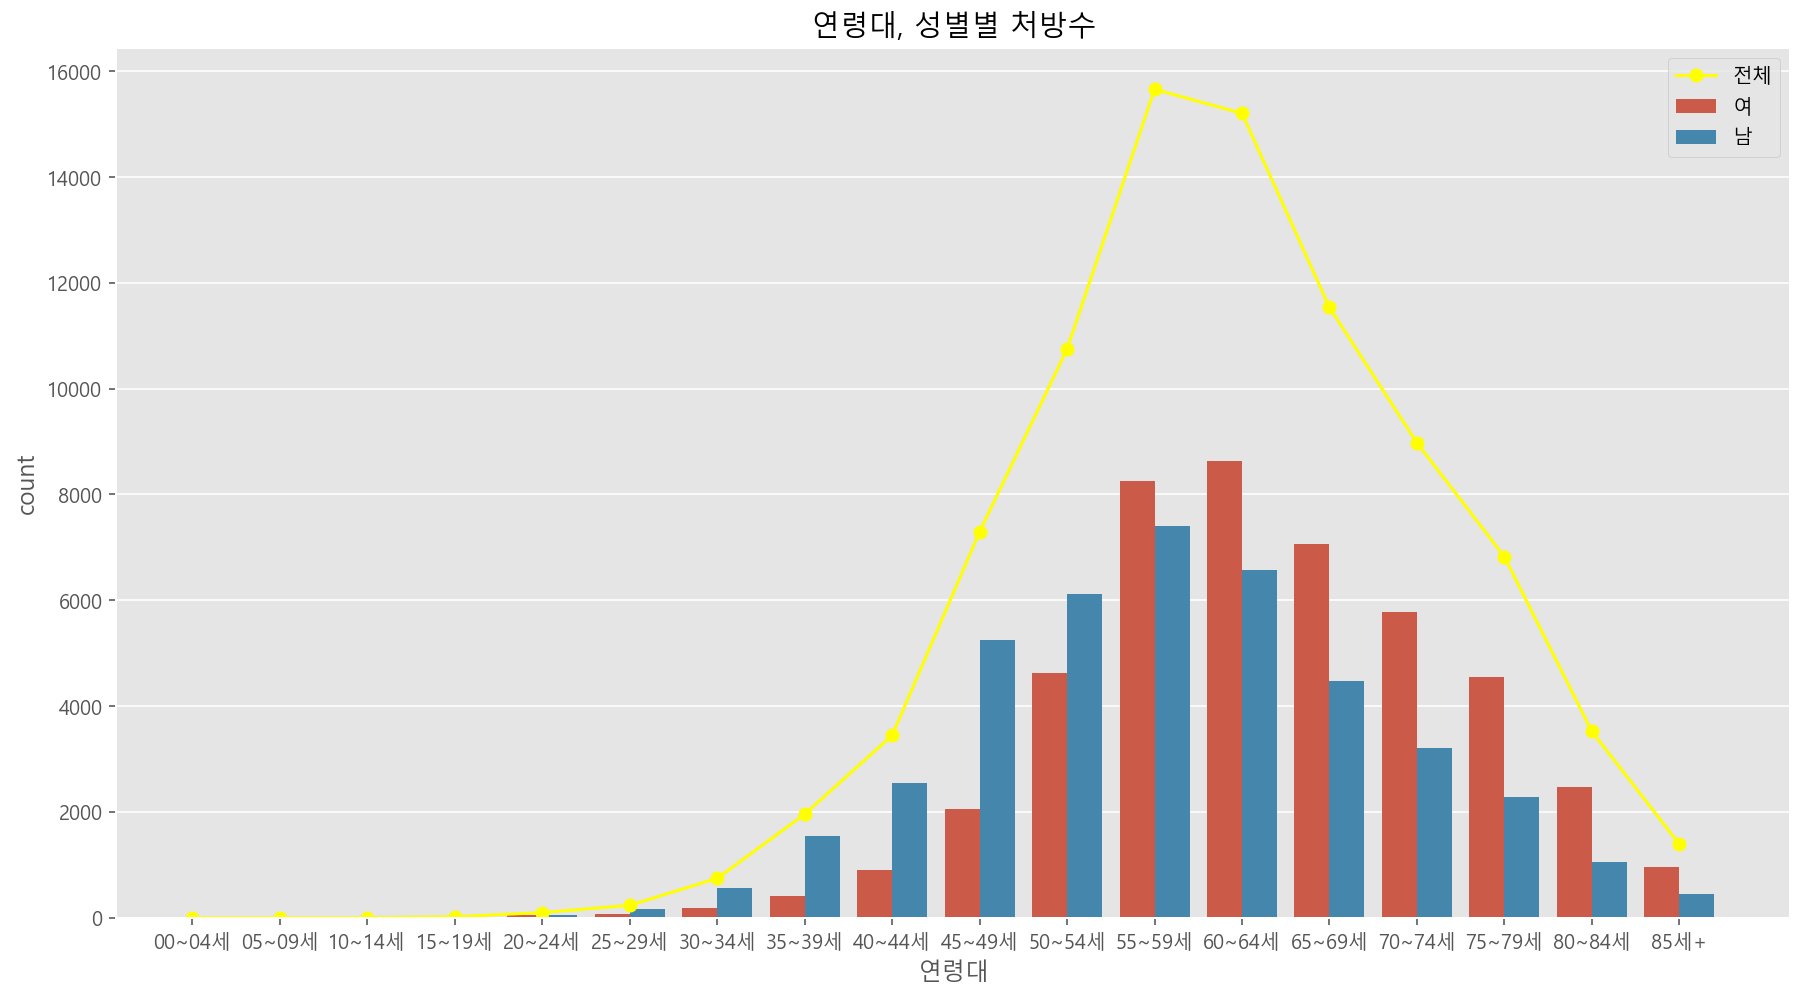

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df_all, x="연령대", order=age_name_list, hue="성별")
# sns.pointplot(data=df_all, x="연령대", y='가입자일련번호', estimator='count')
plt.plot(age_name_list, number_age, color='yellow', marker='o')
plt.legend(['전체', '여', '남'])
plt.title('연령대, 성별별 처방수')

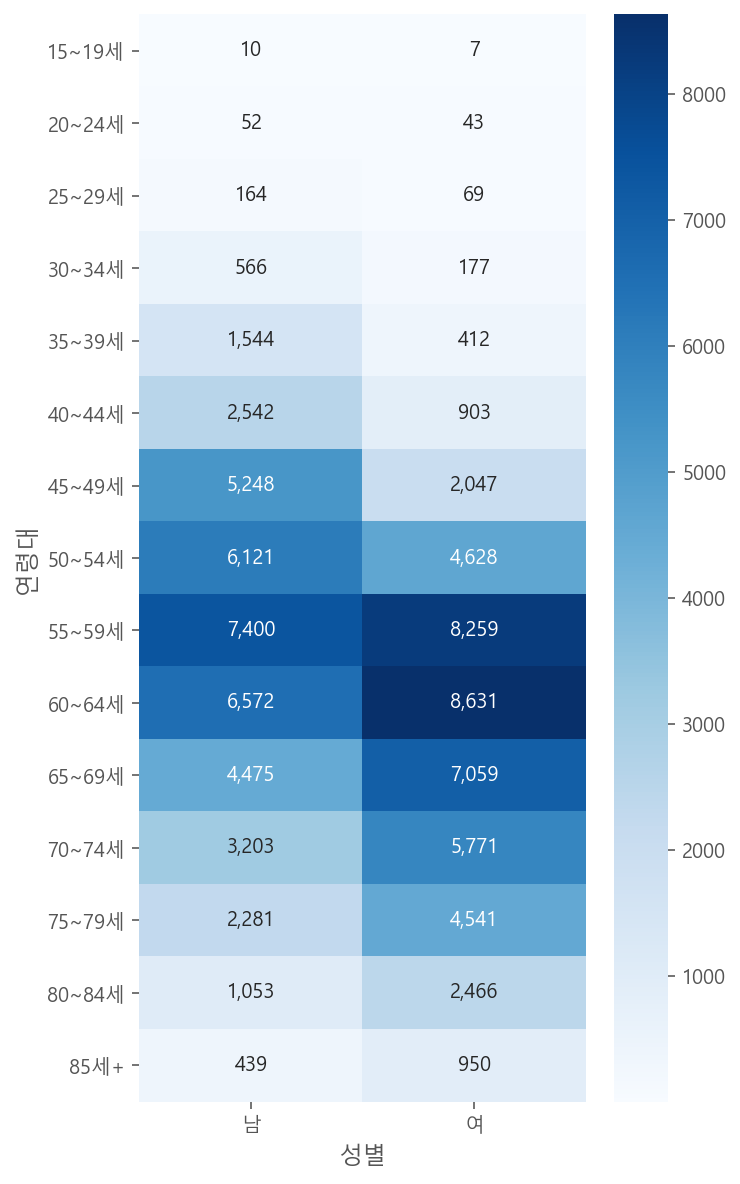

In [ ]:
plt.figure(figsize=(5, 10))
sns.heatmap(gender_age, annot=True, fmt=",.0f", cmap="Blues")

#### 분석: 55-59세에 처방수 제일 많았다.  55-59세 이전에 남자는 여자보다 처방 더 많이 받았지만 55~59세부터 여자는 남자보다 처방 더 많이 받았다. <br>

## 2.2 요양개시일자 별

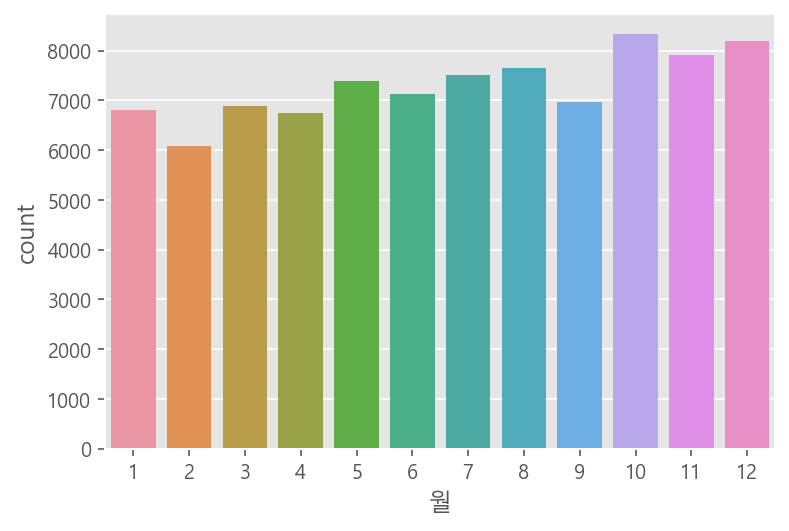

In [ ]:
sns.countplot(data=df_all, x="월")

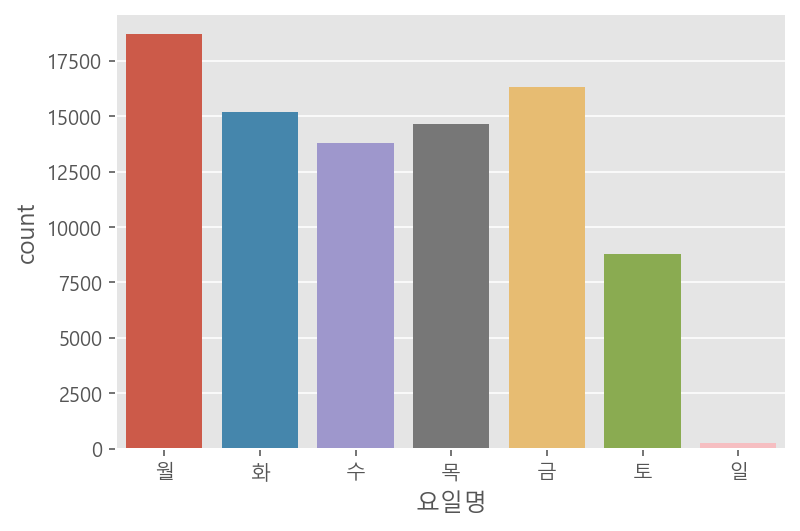

In [ ]:
sns.countplot(data=df_all, x="요일명", order=list(weekday.values()))

#### 분석: 전체적으로 월별 처방수는 차이가 크지 않았다. 일요일엔 처방수가 제일 낮았는데 사람들은 병원이나 약국에 안 가기 때문인가? ㅎㅎ

## 2.3 시도별 처방수

In [ ]:
city_drug = pd.crosstab(df_all["약품명"], df_all["시도명"])
city_drug

시도명,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
약품명,,,,,,,,,,,,,,,,,
크레젯정10/10밀리그램_(1정),1019,6882,2273,1666,769,1321,822,2279,4931,192,574,2066,1352,1407,281,1317,947
크레젯정10/20밀리그램_(1정),288,1404,300,224,184,204,106,175,929,51,115,351,217,255,52,163,317
크레젯정10/5밀리그램_(1정),1113,13041,4433,2642,1361,2731,1423,3723,8833,221,1031,3788,2050,1617,349,2374,1470


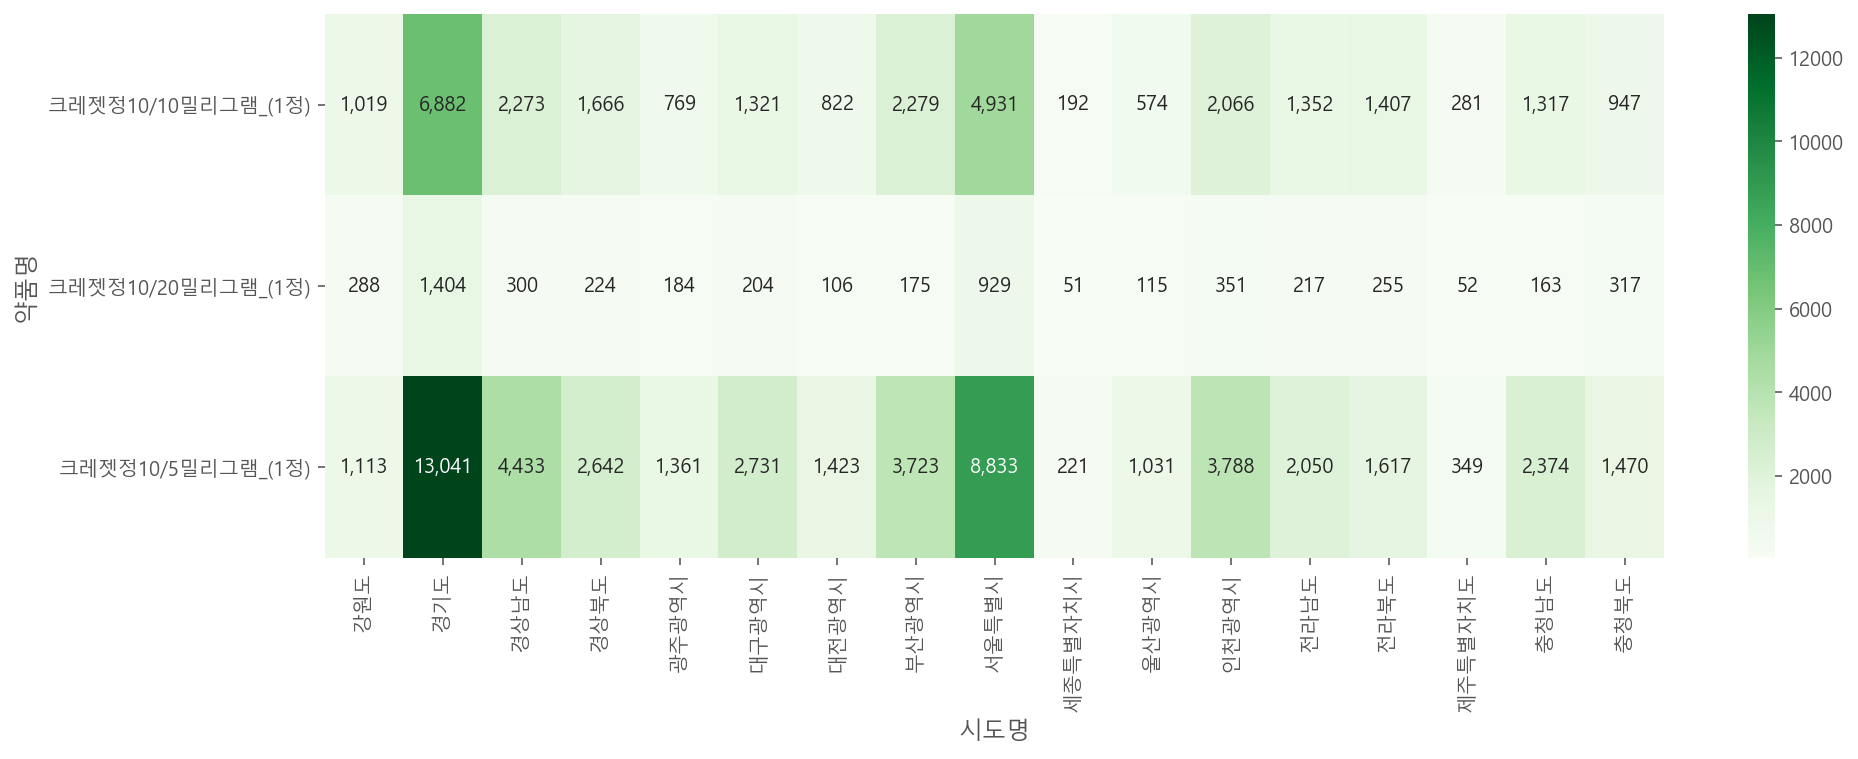

In [ ]:
plt.figure(figsize=(15, 5))
sns.heatmap(city_drug, annot=True, fmt=",.0f", cmap='Greens')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

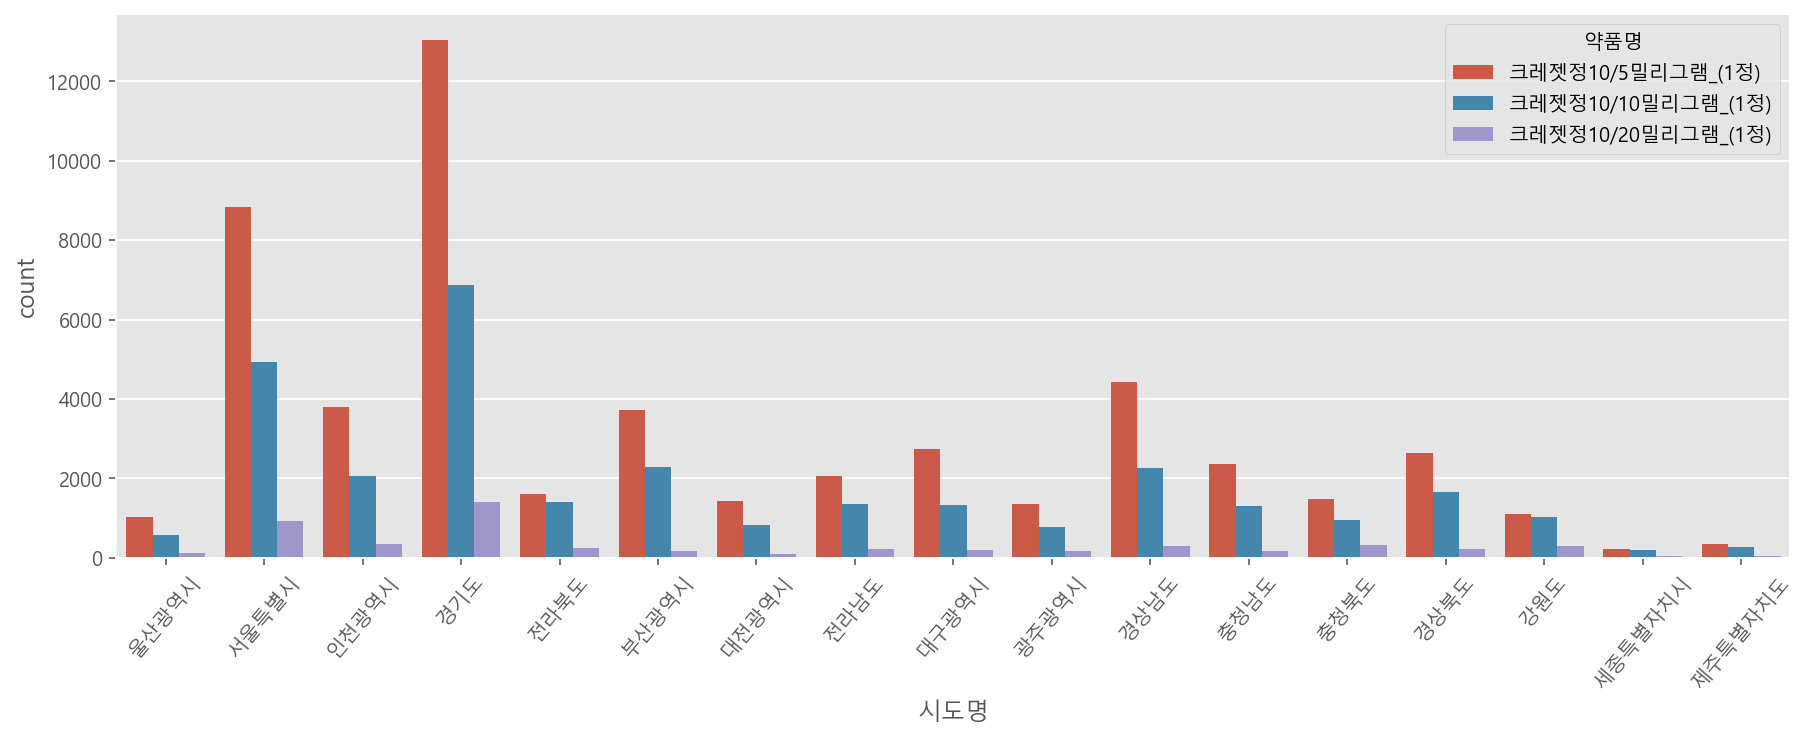

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df_all, x='시도명', hue='약품명')
plt.xticks(rotation=50)

## 2.4 총투여일수 / 투약량 별 처방수

In [ ]:
df_all.groupby(["약품명"])["총투여일수"].agg(['mean', 'sum'])

,mean,sum
약품명,,
크레젯정10/10밀리그램_(1정),45.776065,1377768
크레젯정10/20밀리그램_(1정),58.141706,310186
크레젯정10/5밀리그램_(1정),42.077146,2196427


In [ ]:
df_all.groupby(['약품명', '성별'])['총투여일수'].mean().to_frame()

총투여일수
약품명                성별           
크레젯정10/10밀리그램_(1정) 남   47.264363
                   여   44.392717
크레젯정10/20밀리그램_(1정) 남   62.326836
                   여   53.257920
크레젯정10/5밀리그램_(1정)  남   42.647666
                   여   41.580317

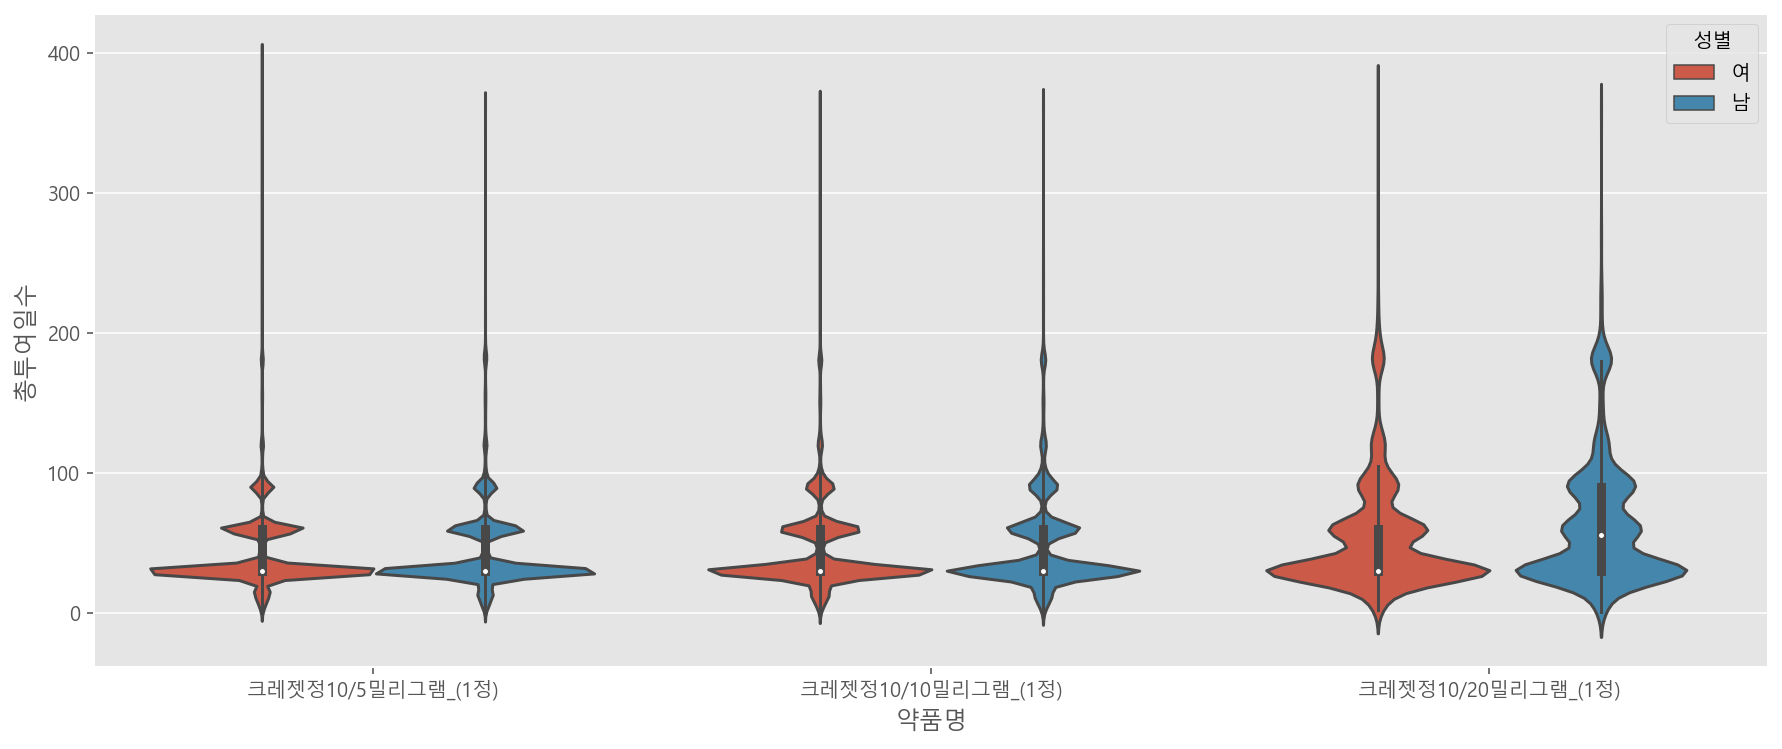

In [ ]:
plt.figure(figsize=(15, 6))
sns.violinplot(data=df_all, x="약품명", y="총투여일수", hue="성별")

#### 분석: 크레젯정10/5밀리그램_(1정)과 크레젯정10/10밀리그램_(1정) 총투여일수의 경우에는 성별에 따라  차이가 아주 작았다.
#### 그러나 크레젯정10/20밀리그램_(1정) 총투여일수의 경우에는 남자가 여자보다 조금 더 많았다. <br>

In [ ]:
age_drug_day = df_all.groupby(['연령대'])['총투여일수'].mean().to_list()
age_drug_day.insert(0, 0)
age_drug_day.insert(1, 0)
age_drug_day.insert(2, 0)

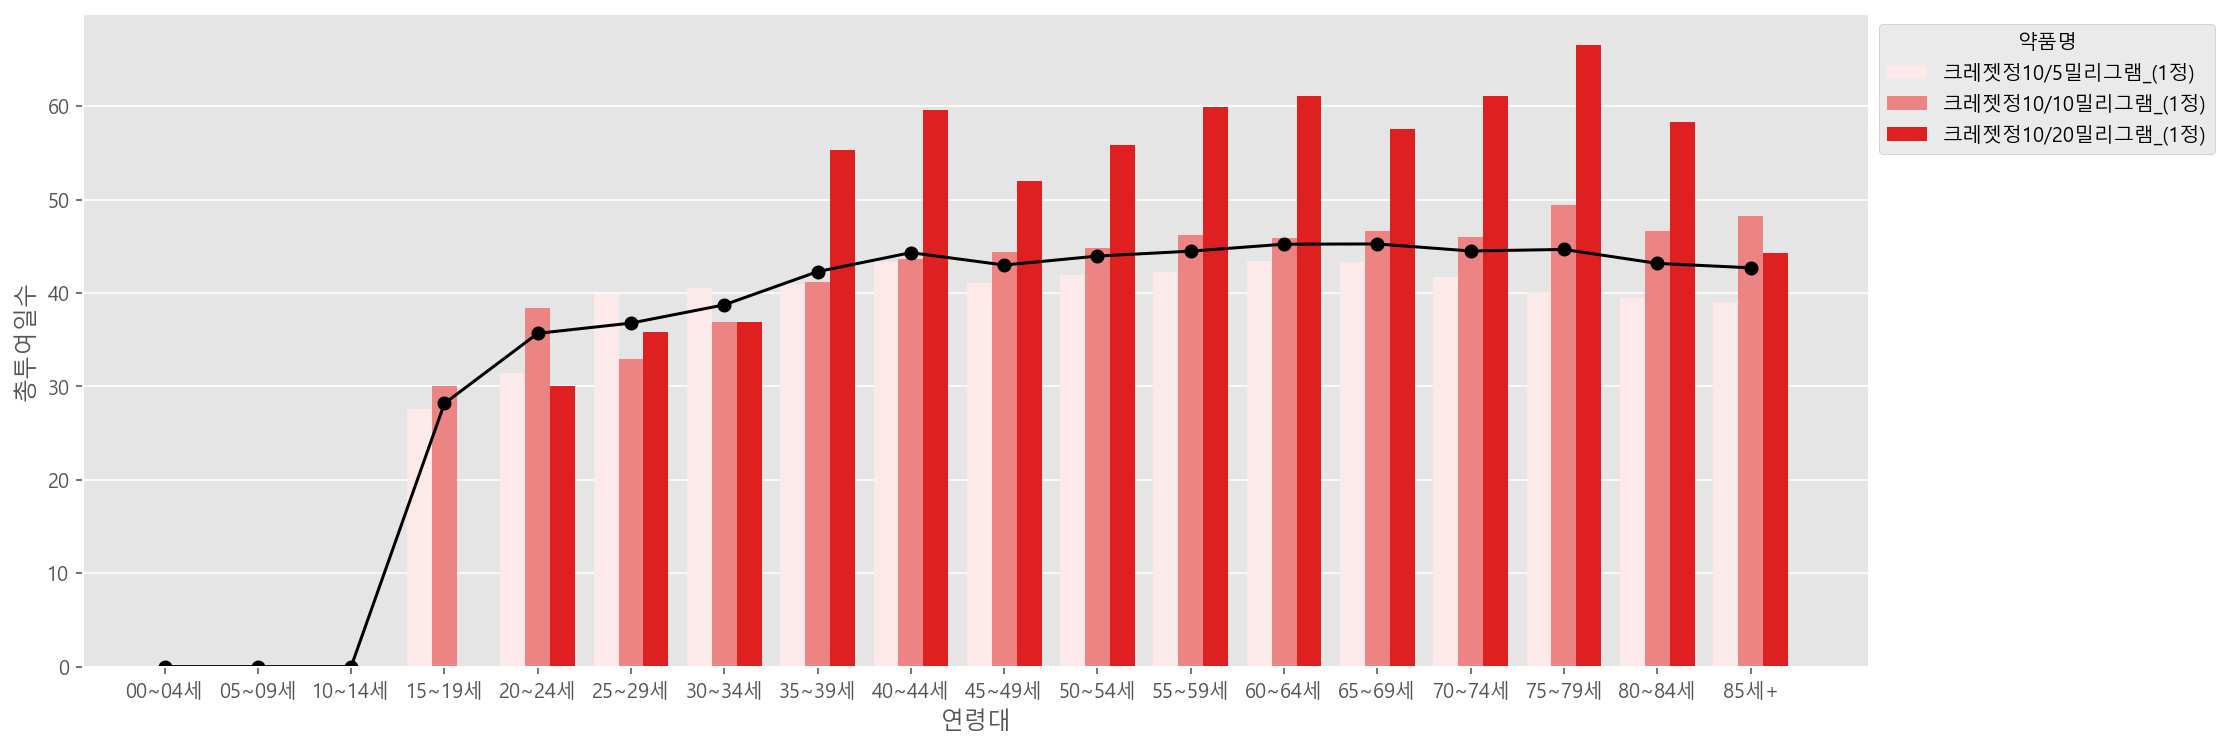

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(data=df_all, x="연령대", y="총투여일수", hue="약품명", order=list(age_dict.values()), color='red', ci=None)
plt.plot(age_name_list, age_drug_day, color='black', marker='o')
plt.legend(bbox_to_anchor=(1, 1), title='약품명')

#### 분석: 평군 총투여일수가 35-39세부터 큰 차이가 없었다.
#### 크레젯정10/20밀리그램_(1정)의 총투여일수가 다른 크레젯정보다 많았다.

In [ ]:
df_all[['1일투약량', '1회투약량']].describe()

,1일투약량,1회투약량
count,87633.000000,87633.000000
mean,1.000422,0.982647
std,0.023643,0.091723
min,1.000000,0.010000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,3.000000,2.000000


## 2.5 단가 / 금액

In [ ]:
def format_number(x):
    if type(x) == "str":
        return x
    else:
        return f"{x:,.0f}"

In [ ]:
df_all.groupby(["약품명"])[["금액","단가"]].mean().style.format(format_number)

,금액,단가
약품명,,
크레젯정10/10밀리그램_(1정),"56,204","1,243"
크레젯정10/20밀리그램_(1정),"72,003","1,257"
크레젯정10/5밀리그램_(1정),"36,808",890


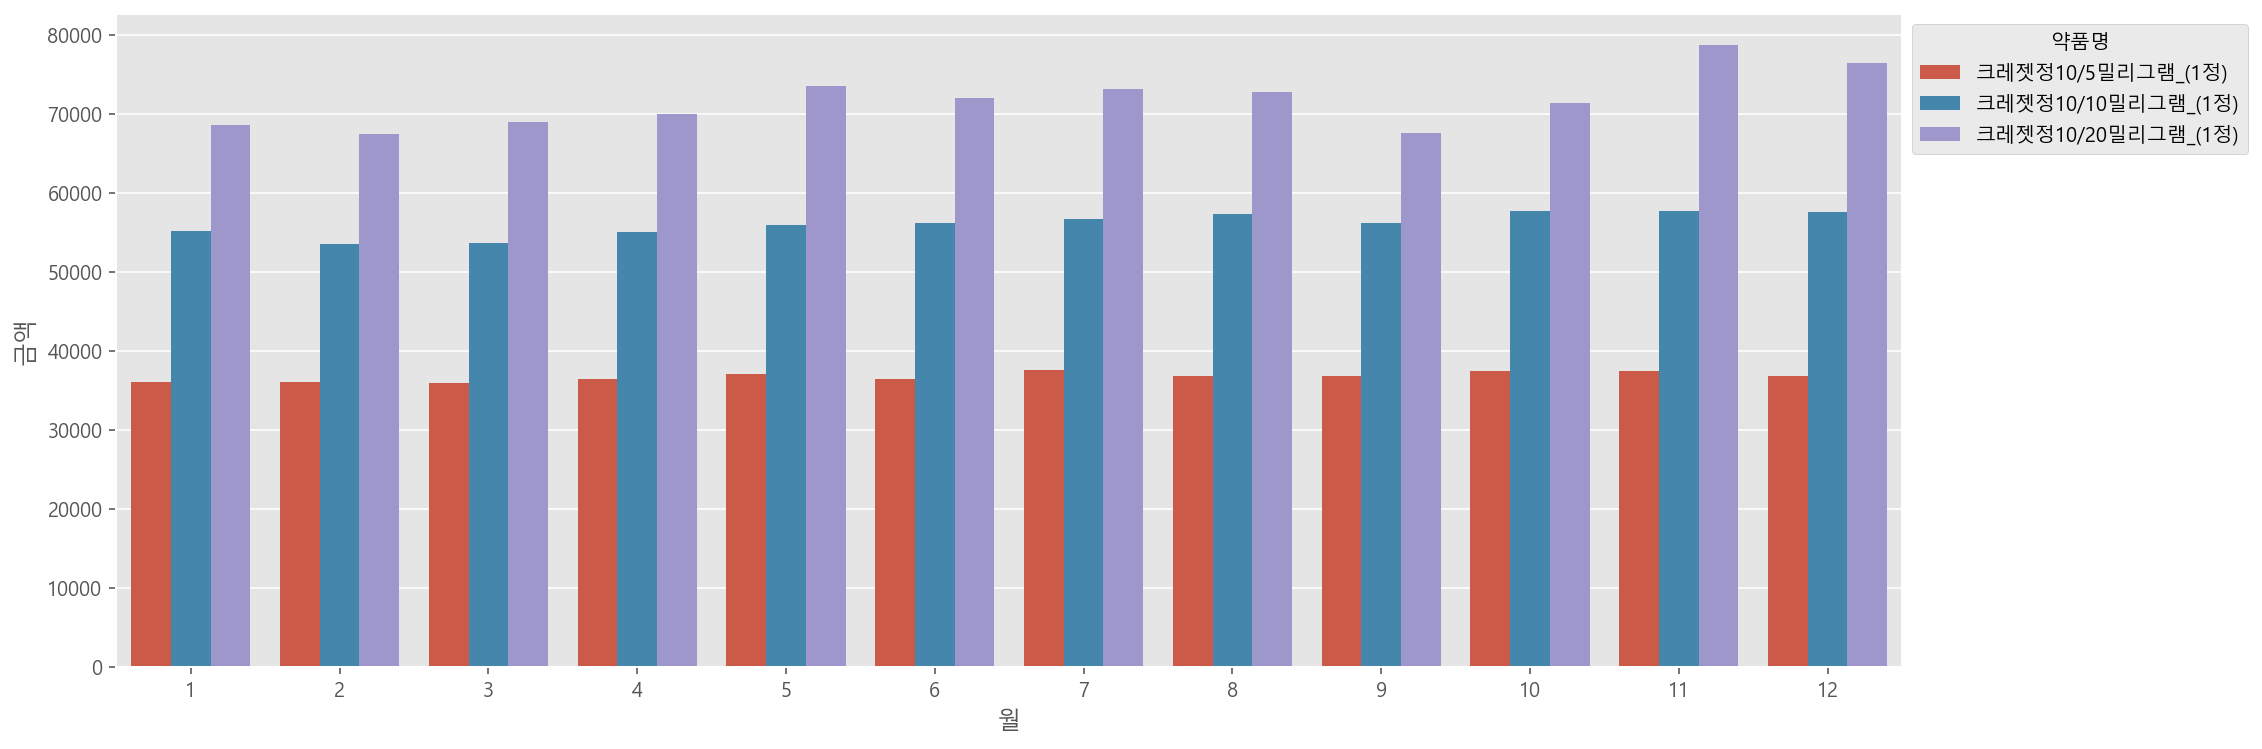

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(data=df_all, x='월', y='금액', hue='약품명', ci=None)
plt.legend(bbox_to_anchor=(1, 1), title='약품명')

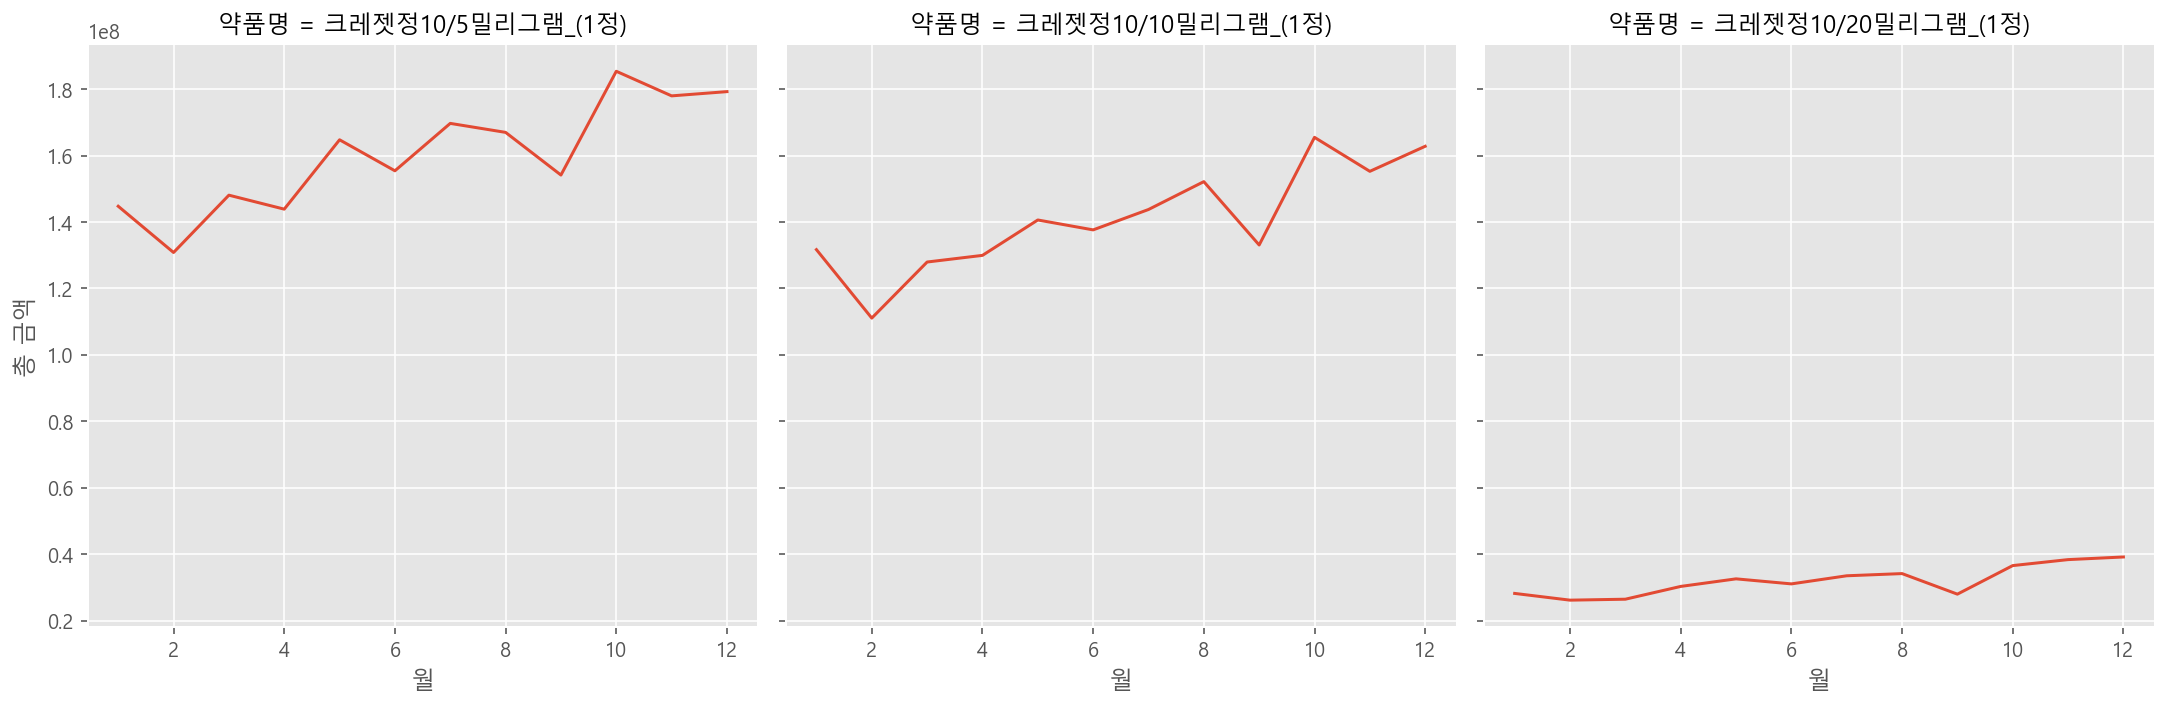

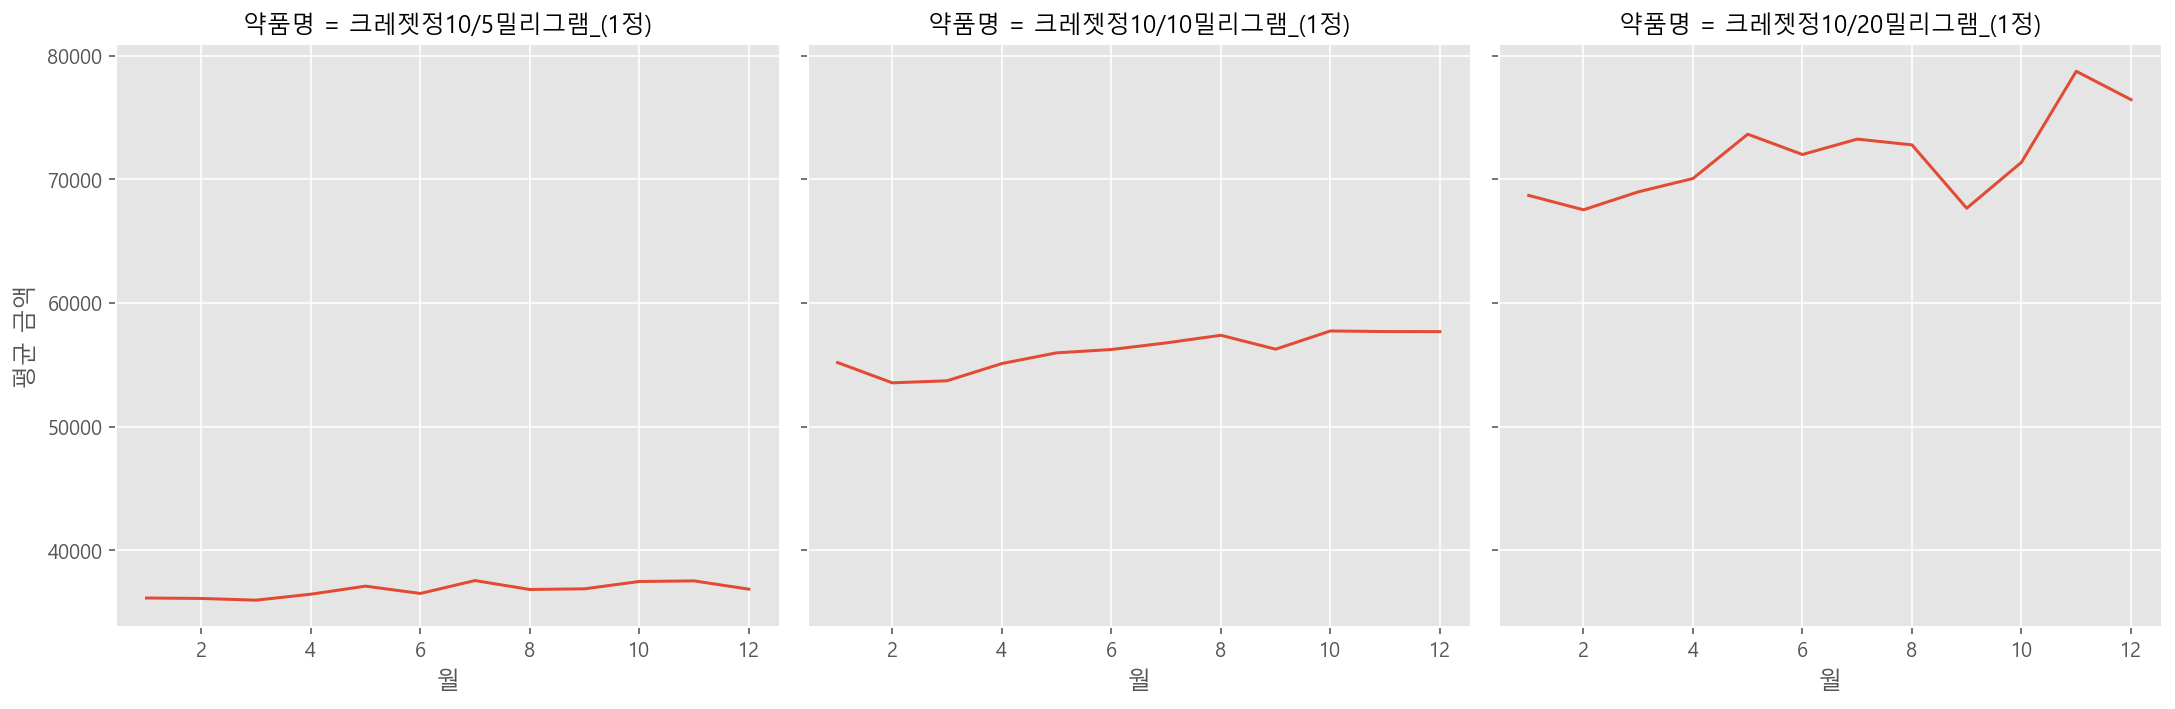

In [ ]:
g1 = sns.relplot(data=df_all, x="월", y="금액", ci=None, estimator="sum",
            col="약품명", col_wrap=4, kind="line")
g1.set_axis_labels(y_var='총 금액')

g2 = sns.relplot(data=df_all, x="월", y="금액", ci=None, estimator="mean",
            col="약품명", col_wrap=4, kind="line")
g2.set_axis_labels(y_var='평균 금액')

#### 분석: 월마다 각별 약품의 금액 평균은 거의 비슷하지만, 상대적으로 크레젯정10/5밀리그램_(1정) 평균 금액이 제일 낮았다.
#### 그러나 월마다 총금액으로 볼 때 크레젯정10/20밀리그램_(1정) 제일 낮았다.

## 2.6 상관관계

In [ ]:
df_corr = df_all.loc[:, ~df_all.columns.isin(['월', '일', '요일', '요일명', '연령대', '성별', '약품명', '시도명',
                                    '기준년도', '데이터공개일자', '가입자일련번호', '처방내역일련번호', '일련번호'])].corr()

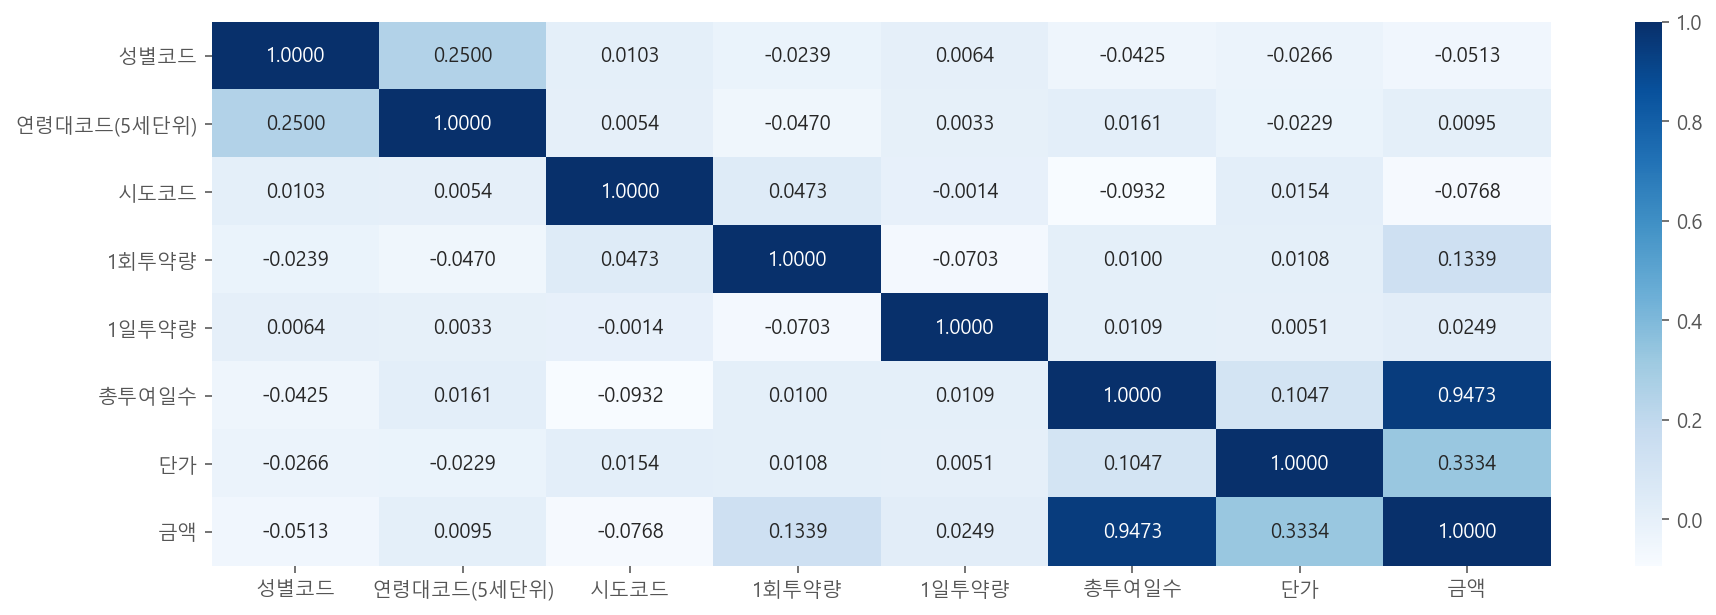

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(df_corr, annot=True, fmt=".4f", cmap="Blues")